
# Exploratory Data Analysis (EDA) + Preprocessing


## --- 1. Imports And Loding Data ---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/organ_matching_project/dummy_organ_data_kidney.csv"

# For local VS Code:
# data_path = "../server/app/ml/data/dummy_organ_data.csv"

df = pd.read_csv(data_path)
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

Mounted at /content/drive
Dataset loaded: 500 rows, 36 columns


## --- 3. Initial Data Overview ---

In [2]:
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())



First 5 rows:
  organ_type  donor_id  donor_age donor_gender  donor_height  donor_weight  \
0     kidney      4009         49       Female         168.6          64.9   
1     kidney      3679         58       Female         179.9          60.1   
2     kidney      6644         59         Male         189.7          80.1   
3     kidney      3867         24       Female         161.6          60.7   
4     kidney      9341         35       Female         183.3          57.2   

  donor_blood_type  donor_has_diabetes  donor_has_hypertension  \
0                B                   0                       0   
1               AB                   0                       1   
2               AB                   1                       1   
3                O                   0                       0   
4               AB                   0                       0   

   donor_serum_creatinine  ... recipient_hla_a recipient_hla_b  \
0                    1.27  ...              A1       

## --- 4. Basic Statistics ---

In [3]:
print("\nBasic Statistics:")
print(df.describe(include='all'))


Basic Statistics:
       organ_type     donor_id   donor_age donor_gender  donor_height  \
count         500   500.000000  500.000000          500    500.000000   
unique          1          NaN         NaN            2           NaN   
top        kidney          NaN         NaN       Female           NaN   
freq          500          NaN         NaN          252           NaN   
mean          NaN  5601.788000   40.956000          NaN    170.921800   
std           NaN  2621.563275   13.595431          NaN     11.896916   
min           NaN  1030.000000   18.000000          NaN    150.200000   
25%           NaN  3348.000000   29.000000          NaN    160.175000   
50%           NaN  5493.500000   41.000000          NaN    171.650000   
75%           NaN  7889.250000   52.000000          NaN    181.500000   
max           NaN  9989.000000   65.000000          NaN    189.900000   

        donor_weight donor_blood_type  donor_has_diabetes  \
count     500.000000              500      

## --- 5. Visualizations ---

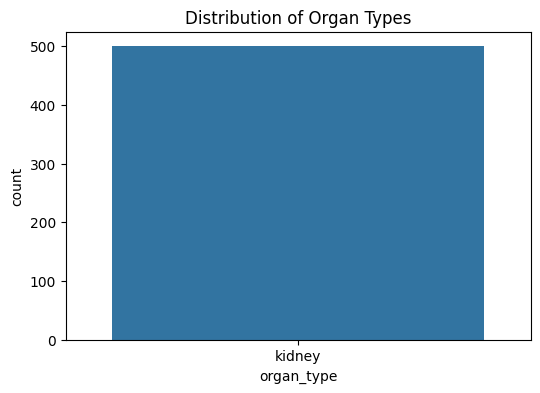

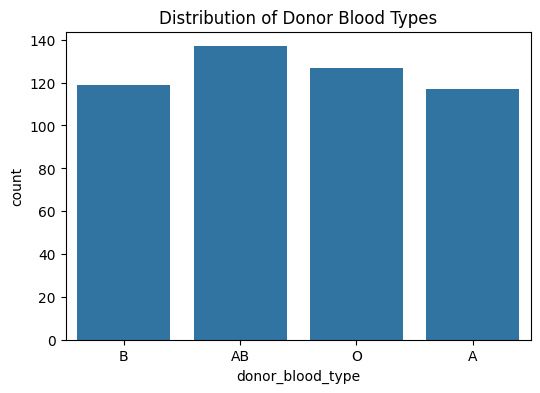

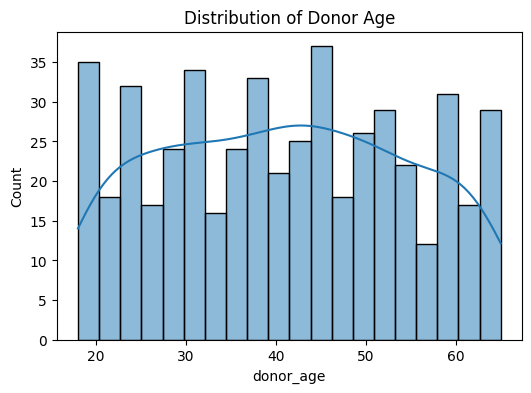

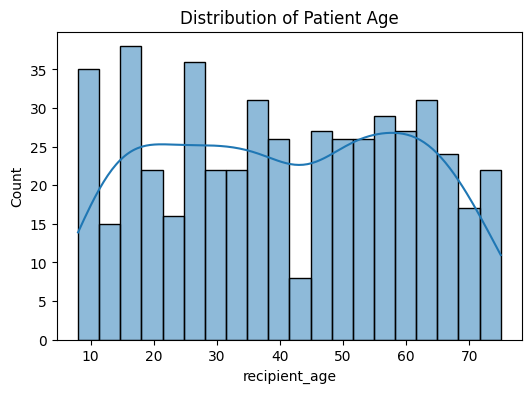

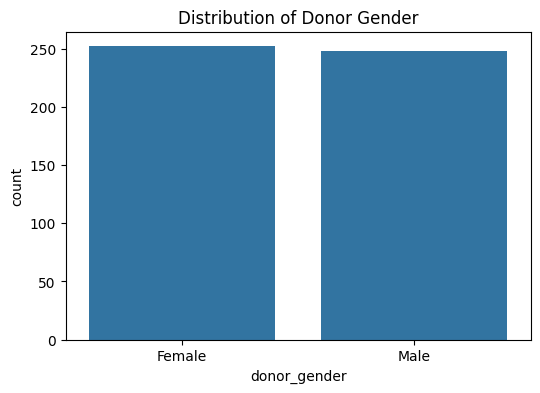

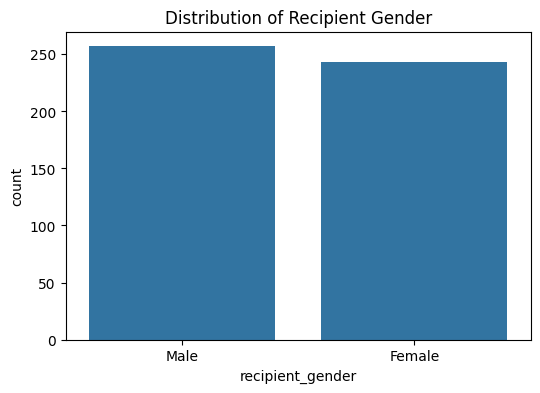

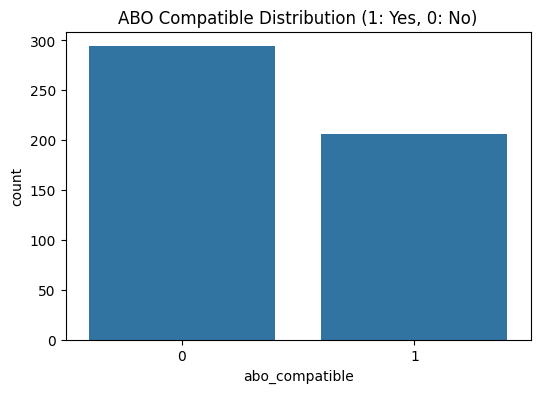

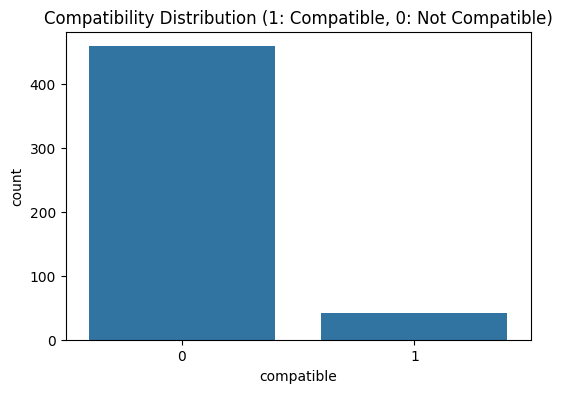

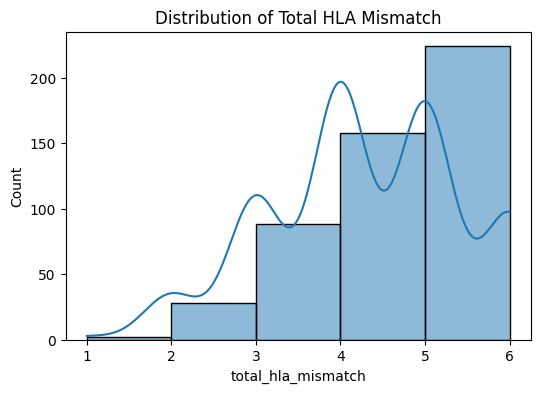

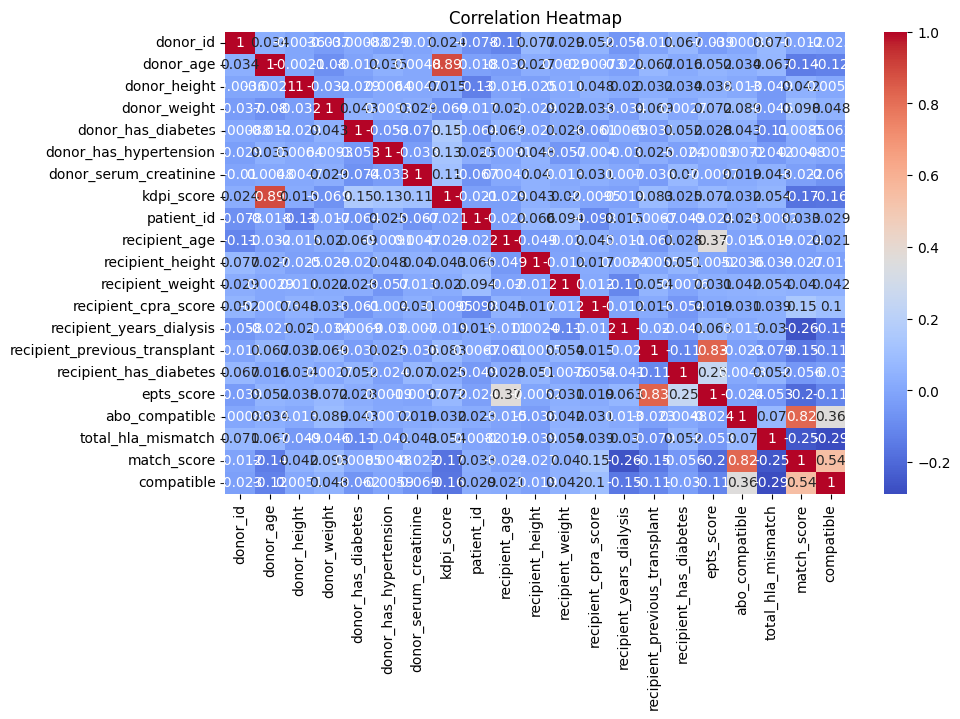

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='organ_type', data=df)
plt.title('Distribution of Organ Types')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='donor_blood_type', data=df)
plt.title('Distribution of Donor Blood Types')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['donor_age'], kde=True, bins=20)
plt.title('Distribution of Donor Age')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['recipient_age'], kde=True, bins=20)
plt.title('Distribution of Patient Age')
plt.show()

# Correlation heatmap (numerical only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## --- 6. Handle Missing Values ---

In [ ]:
df.fillna('Unknown', inplace=True)

## --- 7. Encode Categorical Features ---

In [7]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = [
    "organ_type", "donor_blood_type", "donor_gender",
    "donor_hla_a", "donor_hla_b", "donor_hla_c", "donor_hla_drb1", "donor_hla_dqb1",
    "recipient_gender", "recipient_blood_type",
    "recipient_hla_a", "recipient_hla_b", "recipient_hla_c", "recipient_hla_drb1", "recipient_hla_dqb1"
]

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

## --- 8. Save Preprocessed Data ---

In [8]:

processed_path = "/content/drive/MyDrive/organ_matching_project/processed_organ_data_kideny.csv"
os.makedirs(os.path.dirname(processed_path), exist_ok=True)
df.to_csv(processed_path, index=False)
print(f"\nProcessed dataset saved to: {processed_path}")


Processed dataset saved to: /content/drive/MyDrive/organ_matching_project/processed_organ_data_kideny.csv


### --- 9. Save Encoders (Optional) ---

In [ ]:

import pickle
encoder_path = "/content/drive/MyDrive/organ_matching_project/label_encoders.pkl"
with open(encoder_path, 'wb') as f:
    pickle.dump(encoders, f)
print(f"Encoders saved to: {encoder_path}")

Encoders saved to: /content/drive/MyDrive/organ_matching_project/label_encoders.pkl
